In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import jaccard_similarity_score

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [3]:
test = pd.read_csv("test.csv")
test.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,7500,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,7501,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,7502,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,7503,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,7504,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [4]:
train.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [5]:
train.shape

(7500, 18)

In [6]:
test.shape

(2500, 17)

In [7]:
test.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [8]:
#Months since last delinquent has a lot of missing values . Drop the column
train.drop(columns = ['Months since last delinquent'],inplace = True)
test.drop(columns = ['Months since last delinquent'],inplace = True)

In [9]:
#Id will not contribute to the loan defaulting , drop the column
train.drop(columns = ['Id'],inplace = True)
test.drop(columns = ['Id'],inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

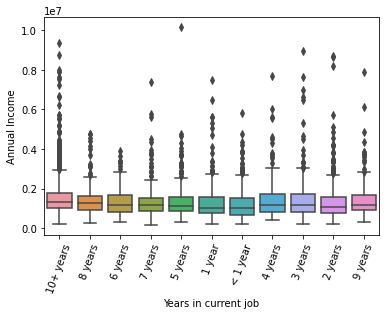

In [10]:
#annual income
sns.boxplot(x='Years in current job',y='Annual Income',data = train)
plt.xticks(rotation = 70)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

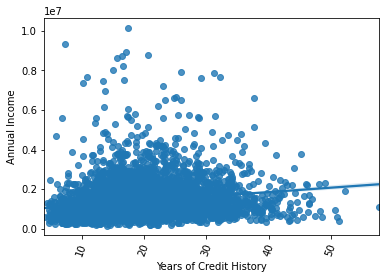

In [11]:
sns.regplot(x='Years of Credit History',y='Annual Income',data = train)
plt.xticks(rotation = 70)

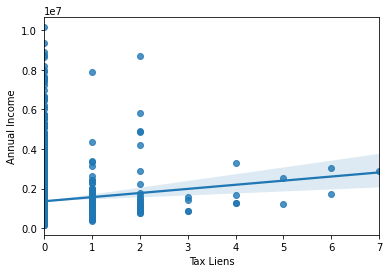

In [12]:
sns.regplot(x='Tax Liens',y='Annual Income',data = train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

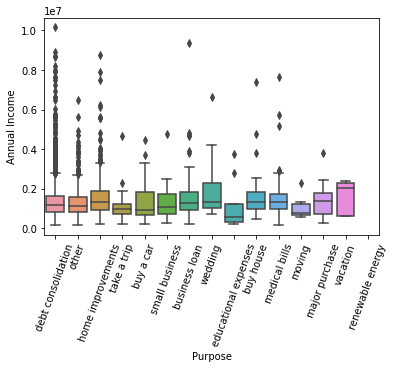

In [13]:
sns.boxplot(x='Purpose',y='Annual Income',data = train)
plt.xticks(rotation = 70)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 <a list of 8 Text major ticklabel objects>)

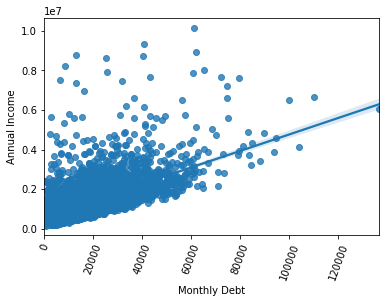

In [14]:
sns.regplot(x='Monthly Debt',y='Annual Income',data = train)
plt.xticks(rotation = 70)

In [15]:
# we can see a linear relationship of the annual income with monthly debt
#so we can predict the annual income by plotting a linear grapgh
y = train.loc[train["Annual Income"].notnull(), "Annual Income"]
x = train.loc[train["Annual Income"].notnull(), "Monthly Debt"].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
train.loc[train["Annual Income"].isnull(), "Annual Income"] = lr.predict(train.loc[train["Annual Income"].isnull(),"Monthly Debt"].values.reshape(-1,1))

In [17]:
train.isnull().sum()

Home Ownership                  0
Annual Income                   0
Years in current job          371
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Bankruptcies                   14
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                 1557
Credit Default                  0
dtype: int64

In [18]:
test.loc[test["Annual Income"].isnull(), "Annual Income"] = lr.predict(test.loc[test["Annual Income"].isnull(),"Monthly Debt"].values.reshape(-1,1))

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000.]),
 <a list of 8 Text major ticklabel objects>)

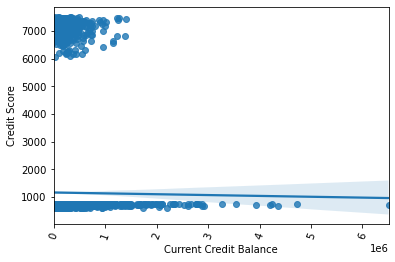

In [19]:
sns.regplot(x='Current Credit Balance',y='Credit Score',data = train)
plt.xticks(rotation = 70)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

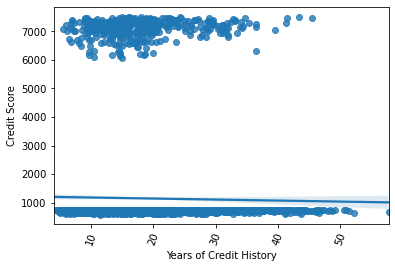

In [20]:
sns.regplot(x='Years of Credit History',y='Credit Score',data = train)
plt.xticks(rotation = 70)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 <a list of 8 Text major ticklabel objects>)

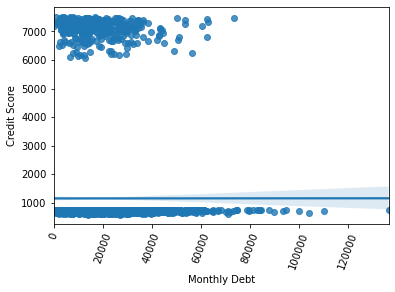

In [21]:
sns.regplot(x='Monthly Debt',y='Credit Score',data = train)
plt.xticks(rotation = 70)

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text major ticklabel objects>)

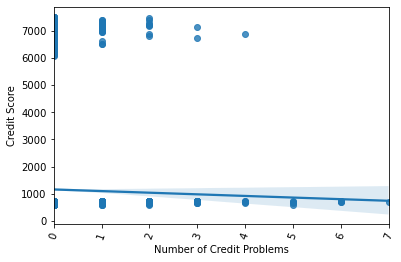

In [22]:
sns.regplot(x='Number of Credit Problems',y='Credit Score',data = train)
plt.xticks(rotation = 70)

In [23]:
train.corr()["Credit Score"]

Annual Income               -0.037832
Tax Liens                    0.010581
Number of Open Accounts      0.016095
Years of Credit History     -0.015683
Maximum Open Credit         -0.009136
Number of Credit Problems   -0.018473
Bankruptcies                -0.027488
Current Loan Amount         -0.108552
Current Credit Balance      -0.006159
Monthly Debt                 0.000234
Credit Score                 1.000000
Credit Default               0.442050
Name: Credit Score, dtype: float64

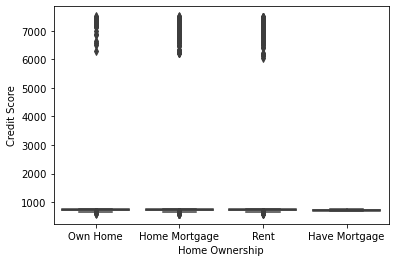

In [24]:
sns.boxplot(x="Home Ownership",y="Credit Score",data=train)

In [25]:
#people who have mortgaged houses have credit scores < 2000

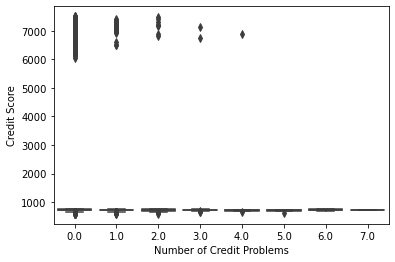

In [26]:
sns.boxplot(x="Number of Credit Problems",y="Credit Score",data=train)

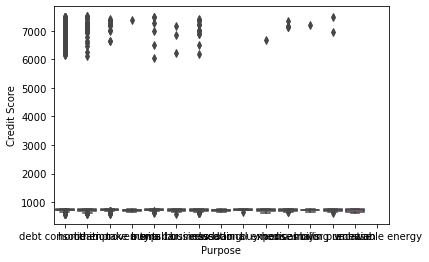

In [27]:
sns.boxplot(x="Purpose",y="Credit Score",data=train)

In [28]:
#we can see that there are usually two clusters
#one with credit score above 5000 and another with credit score below 1000
mean_low = train.loc[train["Credit Score"]<2000,"Credit Score"].mean()
mean_high = train.loc[train["Credit Score"]>5000,"Credit Score"].mean()
print(mean_low,mean_high)

720.7059354140357 7115.1


In [29]:
# how to decide whether the credit score  belongs to cluster 1 or cluster 2 ?
#if number of credit problems is greater than or equal to 5 then low credit score
train.loc[(train["Number of Credit Problems"]>=5) & (train["Credit Score"].isnull()),"Credit Score"] = mean_low
#people who have mortgaged houses have credit scores < 2000
train.loc[(train["Home Ownership"]=="Have Mortgage") & (train["Credit Score"].isnull()),"Credit Score"] = mean_low

In [30]:
#if number of credit problems is greater than or equal to 5 then low credit score
test.loc[(test["Number of Credit Problems"]>=5) & (test["Credit Score"].isnull()),"Credit Score"] = mean_low
#people who have mortgaged houses have credit scores < 2000
test.loc[(test["Home Ownership"]=="Have Mortgage") & (test["Credit Score"].isnull()),"Credit Score"] = mean_low

In [31]:
train.isnull().sum()

Home Ownership                  0
Annual Income                   0
Years in current job          371
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Bankruptcies                   14
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                 1551
Credit Default                  0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

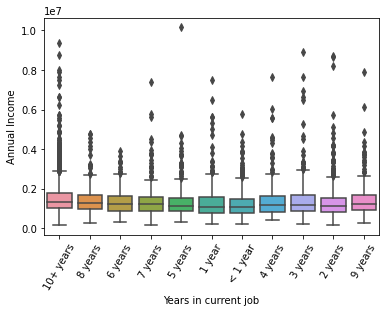

In [32]:
sns.boxplot(x="Years in current job",y="Annual Income",data=train)
plt.xticks(rotation=60)

In [33]:
train.groupby("Years in current job").mean()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Years in current job,,,,,,,,,,,,
1 year,1.266025e+06,0.027778,10.920635,16.502381,5.927536e+05,0.123016,0.085828,1.333974e+07,255974.069444,16495.539683,1253.218593,0.281746
10+ years,1.501556e+06,0.034734,11.438250,20.424014,1.084556e+06,0.193825,0.137709,1.162431e+07,338754.707118,20326.827187,1150.277492,0.276158
2 years,1.318570e+06,0.031206,11.007092,16.646667,5.684199e+05,0.153191,0.100996,1.273345e+07,258549.601418,16578.445390,1087.280859,0.273759
3 years,1.398615e+06,0.020968,11.100000,16.618065,2.692149e+06,0.145161,0.090323,1.138869e+07,256376.438710,18117.264516,1129.253984,0.274194
4 years,1.349266e+06,0.021322,10.976546,16.546482,6.040131e+05,0.159915,0.113006,1.114110e+07,250922.547974,17528.031983,1134.235135,0.279318
5 years,1.323898e+06,0.017442,10.775194,17.010465,6.306296e+05,0.145349,0.104651,9.770763e+06,272394.052326,18047.511628,1116.742332,0.281008
6 years,1.330335e+06,0.028169,11.281690,17.136385,6.712647e+05,0.138498,0.096471,1.435953e+07,279583.215962,18776.082160,1302.296296,0.291080
7 years,1.351527e+06,0.035354,11.825758,17.372727,6.092761e+05,0.156566,0.106061,1.164777e+07,261129.906566,18356.492424,1172.574675,0.280303
8 years,1.401313e+06,0.017699,11.528024,18.120059,7.737092e+05,0.156342,0.106509,1.443569e+07,308857.386431,19470.988201,1040.425000,0.271386


In [34]:
train["Years in current job"].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [35]:
#we can create 4 bins
# annual income 1.2e6 - 1.3e6  => 1 or less year in current job
# annual income 1.3e6 - 1.4e6  => 5 years on an average
# annual income 1.4e6 - 1.5e6  => 8 years on an average
# annual income 1.5e6  and above => 10+
train.loc[(train["Years in current job"].isnull()) & (train["Annual Income"] < 1.3e+06),"Years in current job"] = '1 year'
train.loc[(train["Years in current job"].isnull()) & (train["Annual Income"] < 1.4e+06),"Years in current job"] = '5 years'
train.loc[(train["Years in current job"].isnull()) & (train["Annual Income"] < 1.5e+06),"Years in current job"] = '9 years'
train.loc[(train["Years in current job"].isnull()) & (train["Annual Income"] >= 1.5e+06),"Years in current job"] = '10+ years'

In [36]:
test.loc[(test["Years in current job"].isnull()) & (test["Annual Income"] < 1.3e+06),"Years in current job"] = '1 year'
test.loc[(test["Years in current job"].isnull()) & (test["Annual Income"] < 1.4e+06),"Years in current job"] = '5 years'
test.loc[(test["Years in current job"].isnull()) & (test["Annual Income"] < 1.5e+06),"Years in current job"] = '9 years'
test.loc[(test["Years in current job"].isnull()) & (test["Annual Income"] > 1.5e+06),"Years in current job"] = '10+ years'

In [37]:
train.isnull().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Bankruptcies                   14
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                 1551
Credit Default                  0
dtype: int64

In [38]:
test.isnull().sum()

Home Ownership                 0
Annual Income                  0
Years in current job           0
Tax Liens                      0
Number of Open Accounts        0
Years of Credit History        0
Maximum Open Credit            0
Number of Credit Problems      0
Bankruptcies                   3
Purpose                        0
Term                           0
Current Loan Amount            0
Current Credit Balance         0
Monthly Debt                   0
Credit Score                 512
dtype: int64

In [39]:
#remove the 14 rows with NaN bankruptcy
train = train.loc[train["Bankruptcies"].notnull()]

In [40]:
test["Bankruptcies"].value_counts()

0.0    2252
1.0     234
2.0       5
3.0       3
5.0       2
4.0       1
Name: Bankruptcies, dtype: int64

In [41]:
test.loc[test["Bankruptcies"].isnull(),"Bankruptcies"] = 0.0

In [42]:
train.corr()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.000000,0.063135,0.210633,0.185828,0.015192,-0.019603,-0.069694,0.030680,0.402507,0.629941,-0.035987,-0.079798
Tax Liens,0.063135,1.000000,-0.005448,0.009124,-0.002415,0.595340,0.057360,-0.007785,-0.010267,0.027040,0.009966,0.024393
Number of Open Accounts,0.210633,-0.005448,1.000000,0.144933,0.023846,-0.018085,-0.019130,0.002472,0.266515,0.413439,0.017301,0.028520
Years of Credit History,0.185828,0.009124,0.144933,1.000000,0.029262,0.071351,0.085699,0.009275,0.217856,0.192214,-0.014477,-0.019956
Maximum Open Credit,0.015192,-0.002415,0.023846,0.029262,1.000000,-0.004767,-0.011650,-0.002307,0.088080,0.010135,-0.008942,-0.014292
Number of Credit Problems,-0.019603,0.595340,-0.018085,0.071351,-0.004767,1.000000,0.730751,-0.008417,-0.124423,-0.042942,-0.018543,0.020115
Bankruptcies,-0.069694,0.057360,-0.019130,0.085699,-0.011650,0.730751,1.000000,-0.005987,-0.142849,-0.079579,-0.027508,0.001648
Current Loan Amount,0.030680,-0.007785,0.002472,0.009275,-0.002307,-0.008417,-0.005987,1.000000,0.017020,-0.008481,-0.107983,-0.226311
Current Credit Balance,0.402507,-0.010267,0.266515,0.217856,0.088080,-0.124423,-0.142849,0.017020,1.000000,0.504624,-0.004688,-0.019488
Monthly Debt,0.629941,0.027040,0.413439,0.192214,0.010135,-0.042942,-0.079579,-0.008481,0.504624,1.000000,0.002360,0.018775


In [43]:
test.corr()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
Annual Income,1.000000,0.029834,0.158578,0.184168,0.196909,-0.014134,-0.051807,-0.004999,0.340622,0.545571,-0.046947
Tax Liens,0.029834,1.000000,-0.009228,0.004386,-0.014659,0.715545,0.016254,-0.004599,-0.010357,-0.004147,-0.013496
Number of Open Accounts,0.158578,-0.009228,1.000000,0.108705,0.190505,-0.029556,-0.039553,0.023073,0.223589,0.415060,0.004887
Years of Credit History,0.184168,0.004386,0.108705,1.000000,0.143173,0.072036,0.101417,-0.016172,0.214668,0.192880,0.006600
Maximum Open Credit,0.196909,-0.014659,0.190505,0.143173,1.000000,-0.060845,-0.067368,0.004267,0.667832,0.245732,-0.026115
Number of Credit Problems,-0.014134,0.715545,-0.029556,0.072036,-0.060845,1.000000,0.642138,-0.018175,-0.097057,-0.047975,0.023407
Bankruptcies,-0.051807,0.016254,-0.039553,0.101417,-0.067368,0.642138,1.000000,-0.006301,-0.119453,-0.055484,0.035000
Current Loan Amount,-0.004999,-0.004599,0.023073,-0.016172,0.004267,-0.018175,-0.006301,1.000000,0.007324,0.004710,-0.121797
Current Credit Balance,0.340622,-0.010357,0.223589,0.214668,0.667832,-0.097057,-0.119453,0.007324,1.000000,0.504670,-0.017809
Monthly Debt,0.545571,-0.004147,0.415060,0.192880,0.245732,-0.047975,-0.055484,0.004710,0.504670,1.000000,0.004745


In [44]:
X = train.loc[train["Credit Score"].notnull()]
print(X.shape[0])

5937


In [45]:
Y = X["Credit Score"]
X = X[[x for x in X.columns if x != 'Credit Score' and x != 'Credit Default']]
print(X.shape[0],Y.shape[0])

5937 5937


In [46]:
#getting dummy variables for the categorical variables
dummy_cols = ["Home Ownership","Years in current job","Purpose","Term"]
for col in dummy_cols:
    X = pd.concat([X,pd.get_dummies(X[col]).iloc[:,1:]],axis=1)
    X.drop(columns = [col],inplace=True)

In [47]:
X

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,home improvements,major purchase,medical bills,moving,other,small business,take a trip,vacation,wedding,Short Term
0,482087.0,0.0,11.0,26.3,685960.0,1.0,1.0,99999999.0,47386.0,7914.0,...,0,0,0,0,0,0,0,0,0,1
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,0.0,264968.0,394972.0,18373.0,...,0,0,0,0,0,0,0,0,0,0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,0.0,99999999.0,308389.0,13651.0,...,0,0,0,0,0,0,0,0,0,1
3,805068.0,0.0,8.0,22.5,147400.0,1.0,1.0,121396.0,95855.0,11338.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,0.0,13.0,13.6,385836.0,1.0,0.0,125840.0,93309.0,7180.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,2833185.0,0.0,18.0,21.3,280170.0,0.0,0.0,437404.0,108889.0,61150.0,...,0,0,0,0,0,0,0,0,0,1
7493,1257610.0,0.0,14.0,16.5,821480.0,0.0,0.0,448052.0,167428.0,27562.0,...,0,0,0,0,0,0,0,0,0,0
7495,402192.0,0.0,3.0,8.5,107866.0,0.0,0.0,129360.0,73492.0,1900.0,...,0,0,0,0,1,0,0,0,0,1
7496,1533984.0,0.0,10.0,26.5,686312.0,0.0,0.0,444048.0,456399.0,12783.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Y = list(Y.values)
ones = 0
zero = 0
for i,j in enumerate(Y):
    if(j<2000):
        Y[i]=0
        zero+=1
    else:
        Y[i] = 1
        ones+=1
print(zero,ones)
print(train.loc[train["Credit Score"]<2000].shape[0])

5540 397
5540


In [49]:
Y = np.array(Y)

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()

In [53]:
parameters = [{'n_neighbors':[10,11,12],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
knn_gs = GridSearchCV(estimator = knn,param_grid = parameters,scoring = 'accuracy')
knn_gs.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [10, 11, 12]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [54]:
knn_gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 10}

In [55]:
jaccard_similarity_score(ytest,knn_gs.predict(xtest))

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9387205387205387

In [56]:
X = train.loc[train["Credit Score"].isnull()]
print(X.shape[0])

1549


In [57]:
Y = X["Credit Score"]
X = X[[x for x in X.columns if x != 'Credit Score' and x != 'Credit Default']]
print(X.shape[0],Y.shape[0])

1549 1549


In [58]:
dummy_cols = ["Home Ownership","Years in current job","Purpose","Term"]
for col in dummy_cols:
    X = pd.concat([X,pd.get_dummies(X[col]).iloc[:,1:]],axis=1)
    X.drop(columns = [col],inplace=True)
train_cols = X.columns

In [59]:
X = X.values

In [60]:
ypred = knn_gs.predict(X)

In [61]:
for i,j in enumerate(ypred):
    if(j==0):
        ypred[i]=mean_low
    else:
        ypred[i]=mean_high

In [62]:
train.loc[train["Credit Score"].isnull(),"Credit Score"] = ypred

In [63]:
X = test.loc[test["Credit Score"].isnull()]
print(X.shape[0])

512


In [64]:
Y = X["Credit Score"]
X = X[[x for x in X.columns if x != 'Credit Score' and x != 'Credit Default']]
print(X.shape[0],Y.shape[0])

512 512


In [65]:
dummy_cols = ["Home Ownership","Years in current job","Purpose","Term"]
for col in dummy_cols:
    X = pd.concat([X,pd.get_dummies(X[col]).iloc[:,1:]],axis=1)
    X.drop(columns = [col],inplace=True)

X.insert(25,'educational expenses',np.zeros(512))
X.insert(29,'moving',np.zeros(512))
X.insert(31,'renewable energy',np.zeros(512))
X.insert(32,'small business',np.zeros(512))
X.insert(35,'wedding',np.zeros(512))
test_cols = X.columns

In [66]:
X = X.values

In [67]:
ypred = knn_gs.predict(X)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
for i,j in enumerate(ypred):
    if(j==0):
        ypred[i]=mean_low
    else:
        ypred[i]=mean_high

In [69]:
test.loc[test["Credit Score"].isnull(),"Credit Score"] = ypred

In [70]:
train.isnull().sum()

Home Ownership               0
Annual Income                0
Years in current job         0
Tax Liens                    0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Bankruptcies                 0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Monthly Debt                 0
Credit Score                 0
Credit Default               0
dtype: int64

In [71]:
test.isnull().sum()

Home Ownership               0
Annual Income                0
Years in current job         0
Tax Liens                    0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Bankruptcies                 0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Monthly Debt                 0
Credit Score                 0
dtype: int64

In [72]:
#THE DATA IS NOW CLEAN